In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data generation

(100, 1)


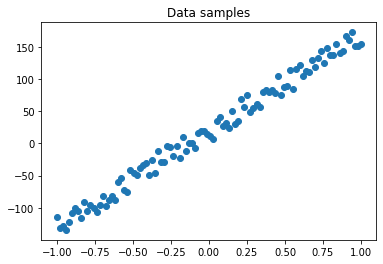

In [2]:
# generating data samples
x = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
y = 29 * x + 40 * np.random.rand(100,1)
print(x.shape)

# normalization of input data
x /= np.max(x)

plt.title('Data samples')
plt.scatter(x, y);

## Sklearn Linear regression

Sklearn MSE:  109.58932603991377


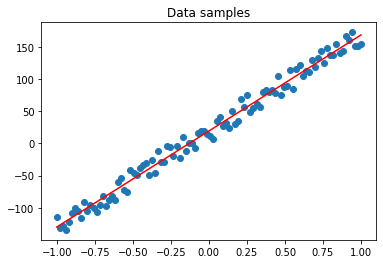

In [3]:
sklearn_model = LinearRegression()
sklearn_model.fit(x, y)
y_hat_sklearn = sklearn_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat_sklearn, color='r');

print('Sklearn MSE: ', mean_squared_error(y, y_hat_sklearn))

## Implementation of Linear Regression from scratch

In [13]:
class MyLinearRegression:
    def __init__(self, weights_init='random', add_bias = True, learning_rate=1e-5, 
        num_iterations=1000, verbose=False, max_error=1e-5):
        ''' Linear regression model using gradient descent 

        # Arguments
            weights_init: str
                weights initialization option ['random', 'zeros']
            add_bias: bool
                whether to add bias term 
            learning_rate: float
                learning rate value for gradient descent
            num_iterations: int 
                maximum number of iterations in gradient descent
            verbose: bool
                enabling verbose output
            max_error: float
                error tolerance term, after reaching which we stop gradient descent iterations
        '''

        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.weights_init = weights_init
        self.add_bias = add_bias
        self.verbose = verbose
        self.max_error = max_error
    
    def initialize_weights(self, n_features):
        ''' weights initialization function '''
        if self.weights_init == 'random':
            weights = np.random.rand(n_features, 1)
        elif self.weights_init == 'zeros':
            weights =np.zeros(shape=(n_features, 1))
        else:
            raise NotImplementedError
        return weights

    def cost(self, target, pred):
        ''' calculate cost function 
        
            # Arguments:
                target: np.array
                    array of target floating point numbers 
                pred: np.array
                    array of predicted floating points numbers
        '''
        loss = np.square(target - pred).mean()
        return loss

    def fit(self, x, y):
        n = x.shape[0]
        self.weights = self.initialize_weights(x.shape[1])

        if self.add_bias:
            x = np.hstack((x, np.ones_like(x)))
        else:
            x = np.hstack((x, np.zeros_like(x)))
        self.weights = np.concatenate([self.weights, np.random.rand(1).reshape(1,-1)],axis = 0)
        for i in range(self.num_iterations):
            ################

            # YOUR CODE HERE
            # step 1: calculate current_loss value
            y_pred = x @ self.weights
            current_loss = self.cost(y, y_pred)
            # step 2: calculate gradient value
            derivative_weights = (-2/n) * (x.T @ (y - y_pred))
            #derivative_weights = derivative_weights.reshape(len(derivative_weights),-1)
            # step 3: update weights using learning rate and gradient value
            self.weights = self.weights - self.learning_rate * derivative_weights
            # step 4: calculate new_loss value
            y_pred = x @ self.weights
            new_loss = self.cost(y, y_pred)
            # step 5: if new_loss and current_loss difference is greater than max_error -> break;
            #         if iteration is greater than max_iterations -> break
            if new_loss - current_loss > self.max_error:
                break
            ################
    
    def predict(self, x):
        ''' prediction function '''
        ################

        # YOUR CODE HERE
        if self.add_bias:
            x = np.hstack((x, np.ones_like(x)))
        else:
            x = np.hstack((x, np.zeros_like(x)))
        y_hat = x @ self.weights

        ################
        return y_hat


My MSE:  109.59823671452936


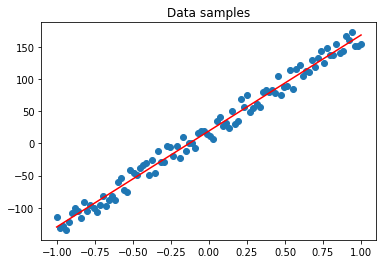

In [14]:
my_model = MyLinearRegression(learning_rate=1e-2)
my_model.fit(x, y)
y_hat = my_model.predict(x)

plt.title('Data samples')
plt.scatter(x, y)
plt.plot(x, y_hat, color='r');

print('My MSE: ', mean_squared_error(y, y_hat))